In [1]:
# Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output

# Load Dataset and Perform Initial Analysis

In [3]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Solar_Panel_Regression/main/solarpowergeneration.csv")

In [4]:
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

In [5]:
# Display dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (2920, 10)


In [6]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


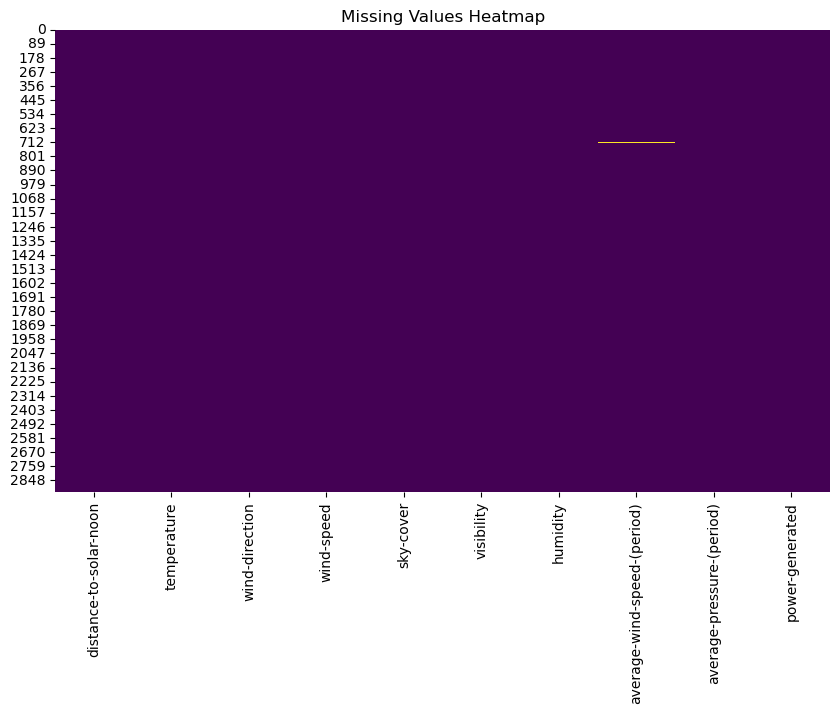

In [9]:
# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Statistical Summary and Correlation Analysis

In [11]:
# Describe Data
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

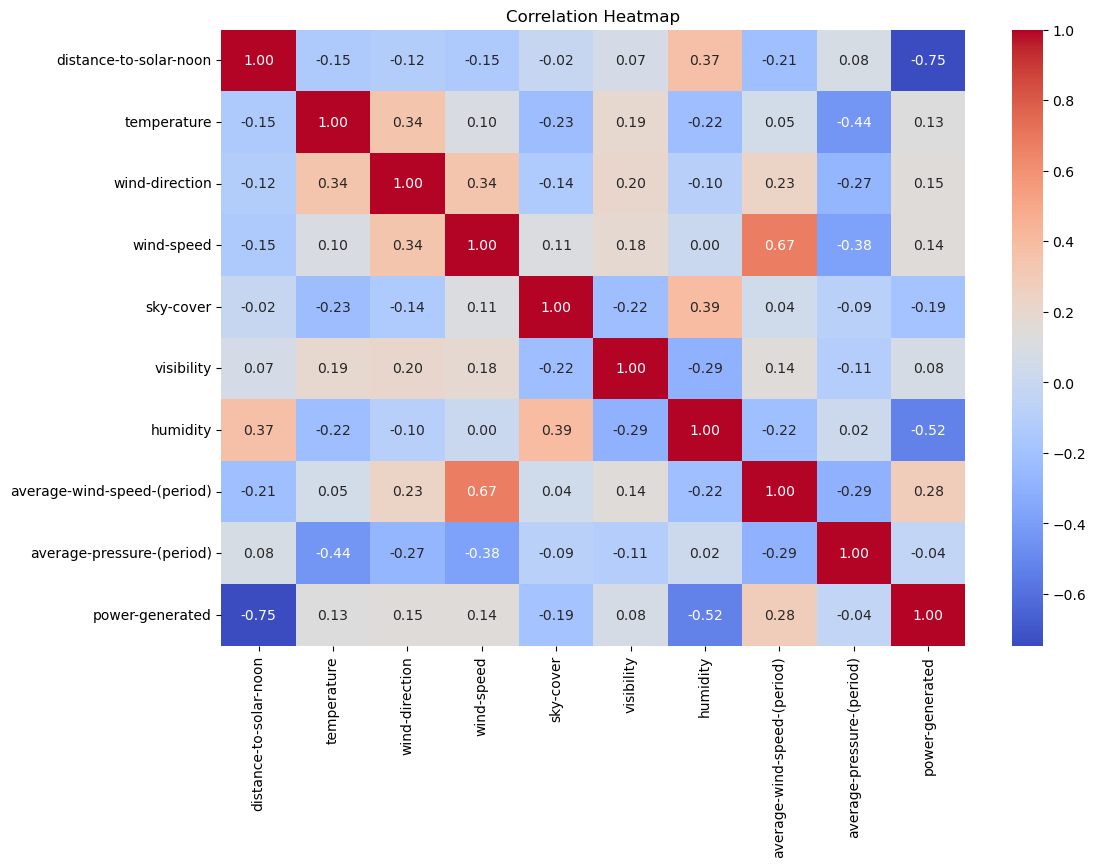

In [12]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize Distributions of Continuous Variables


In [14]:
# Identify numeric columns
continuous_columns = df.select_dtypes(include=np.number).columns

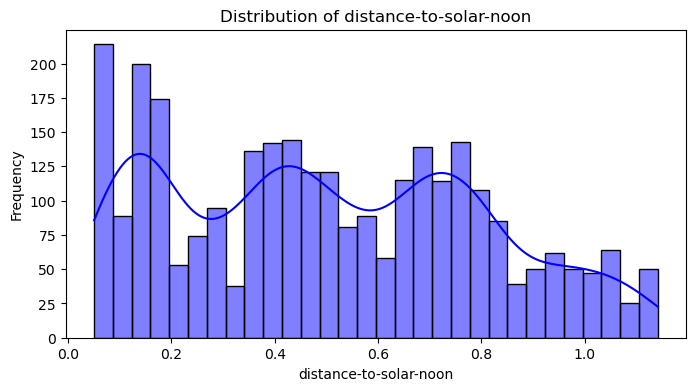

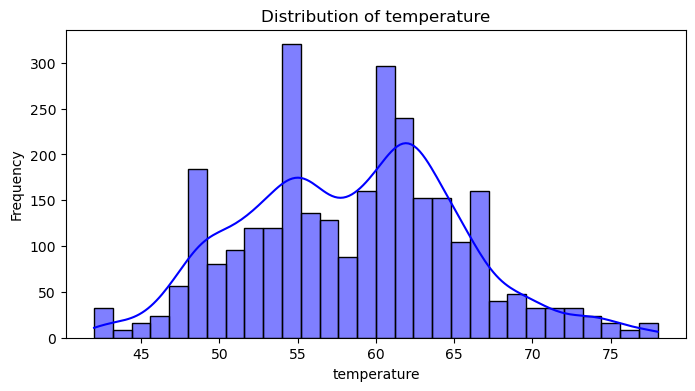

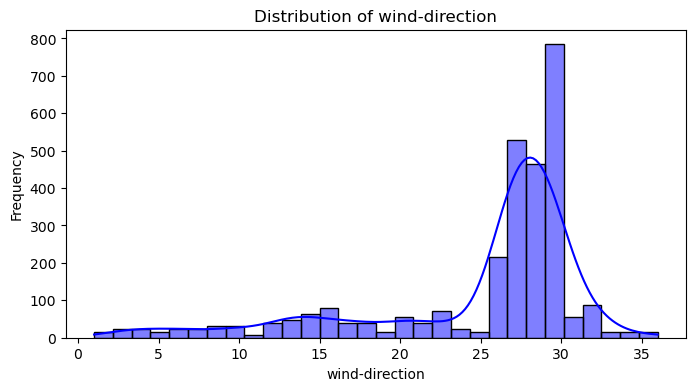

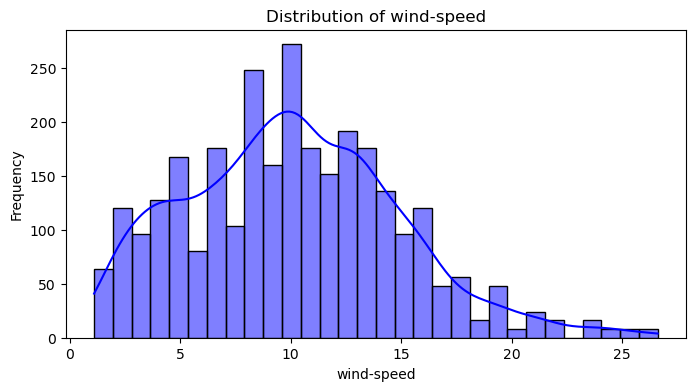

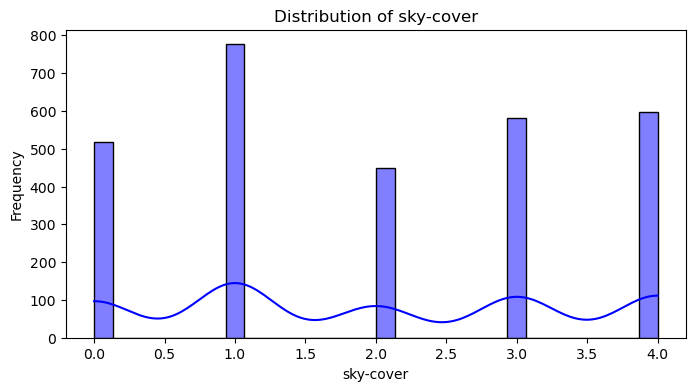

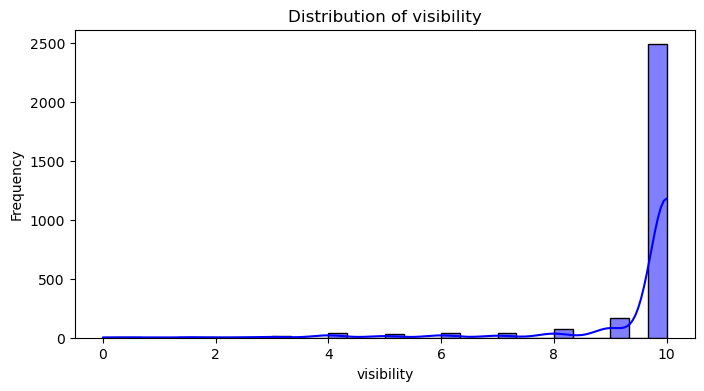

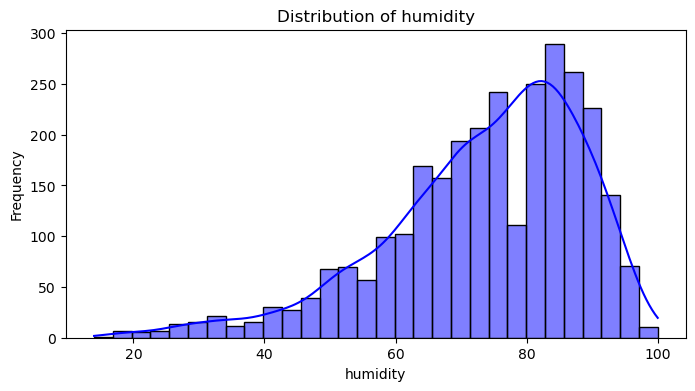

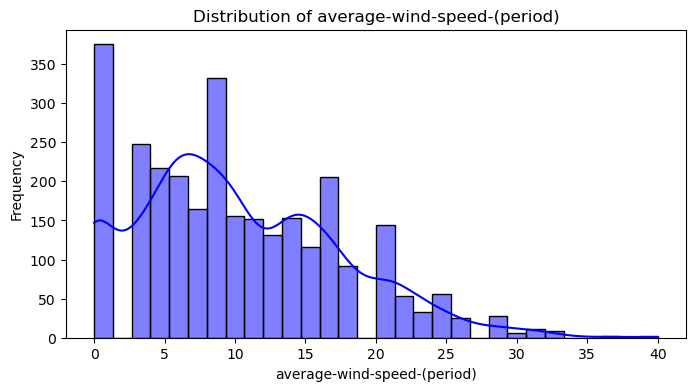

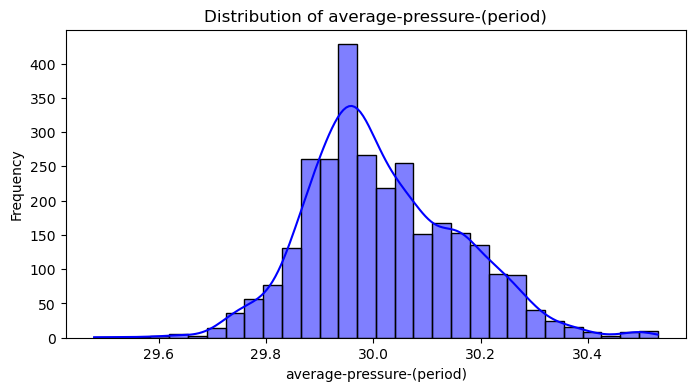

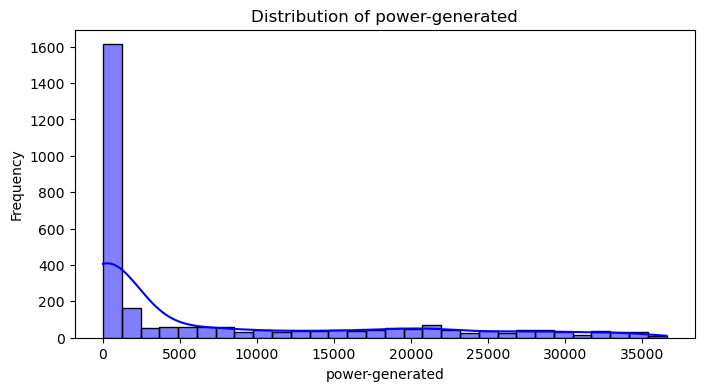

In [15]:
# Plot distributions
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [16]:
# Calculate skewness for each numerical column
skewness = df.skew()

# Print columns with skewness above threshold
skewed_columns = skewness[abs(skewness) > 0.7]  # Threshold of 0.7 for significant skewness
print("Columns with significant skewness (threshold > 0.7):")
print(skewed_columns)

Columns with significant skewness (threshold > 0.7):
wind-direction    -1.629519
visibility        -3.862446
humidity          -0.955607
power-generated    1.307035
dtype: float64


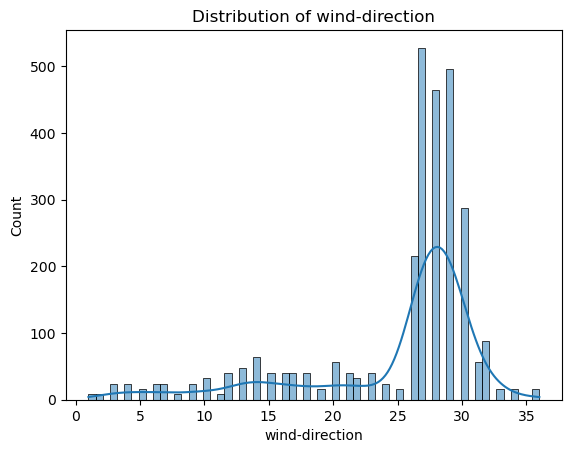

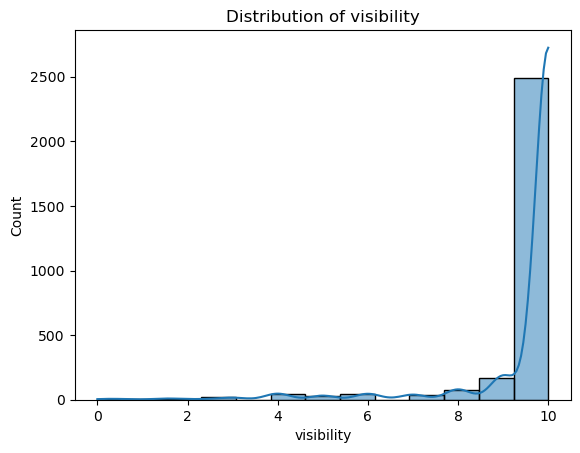

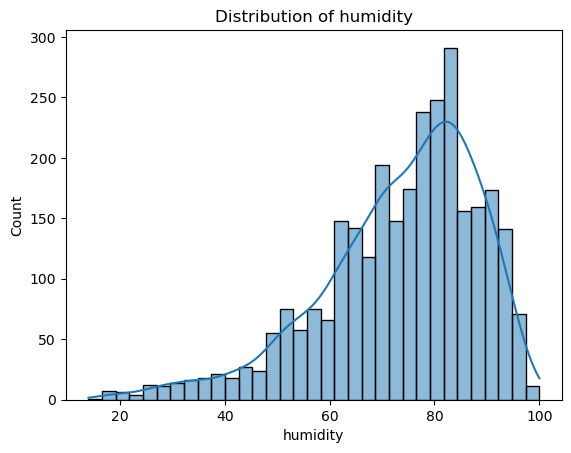

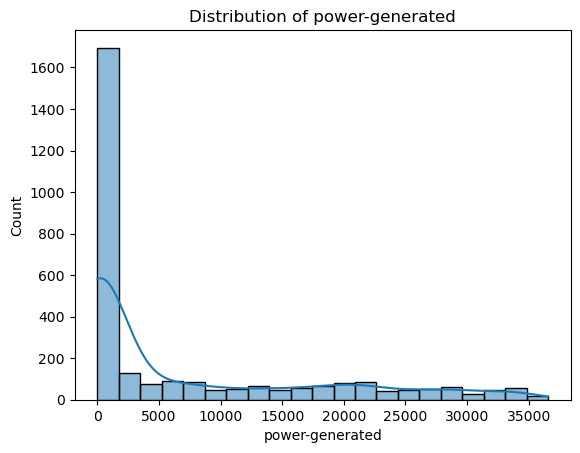

In [17]:
for column in skewed_columns.index:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [18]:
# Apply log transformation 
df['power-generated'] = np.log1p(df['power-generated'] - df['power-generated'].min() + 1)

In [19]:
# Check the skewness after transformation
skewed_columns = df.skew()[abs(df.skew()) > 0.7]
print("Columns with significant skewness after transformation:")
print(skewed_columns)

Columns with significant skewness after transformation:
wind-direction   -1.629519
visibility       -3.862446
humidity         -0.955607
dtype: float64


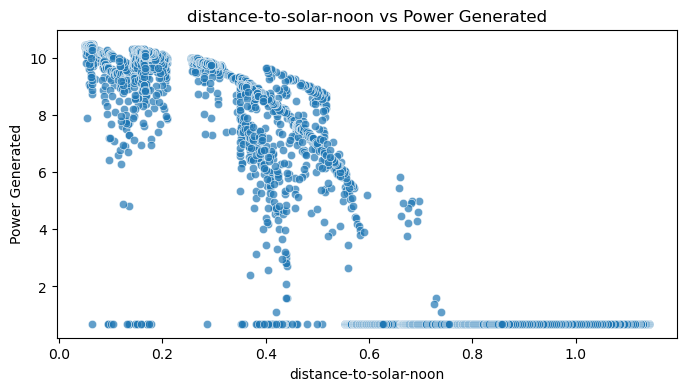

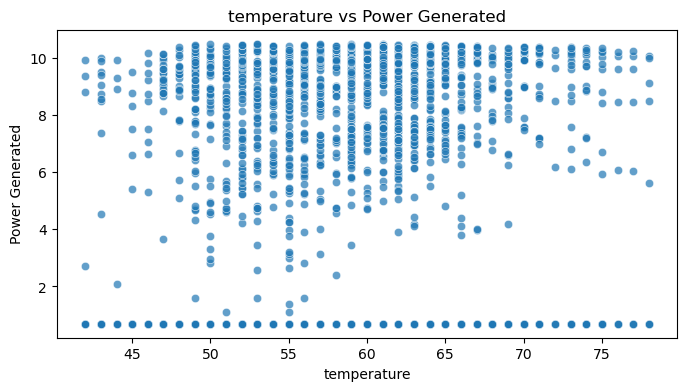

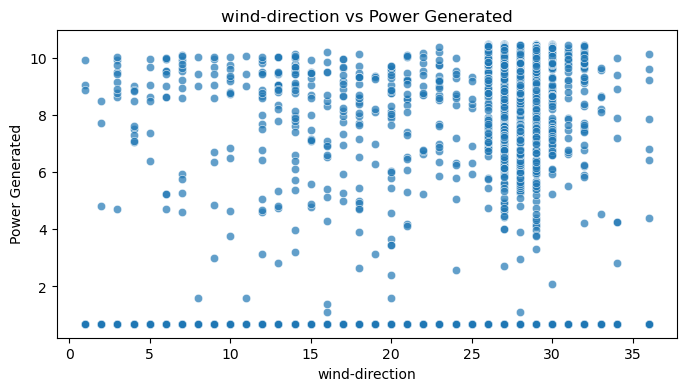

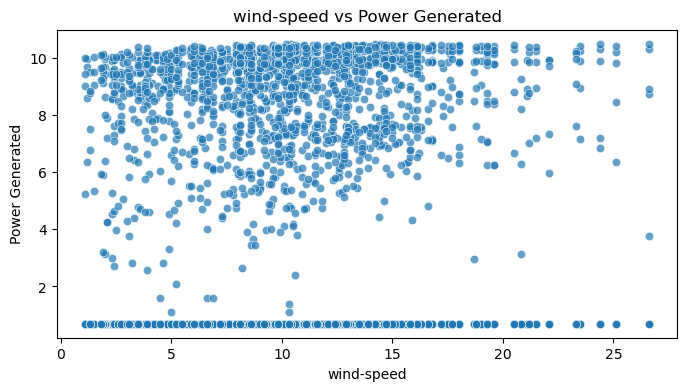

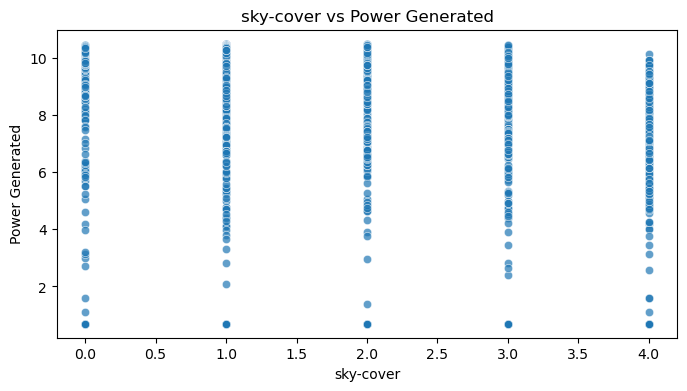

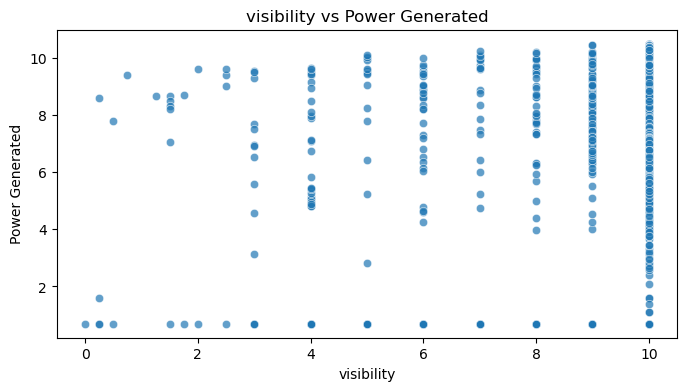

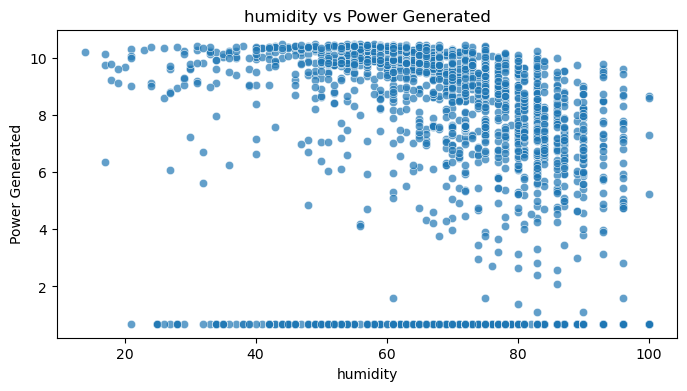

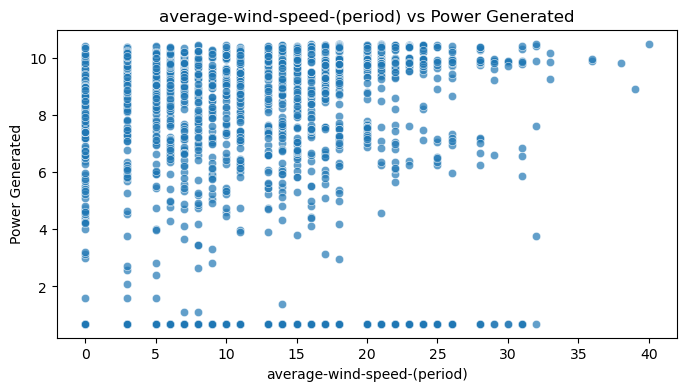

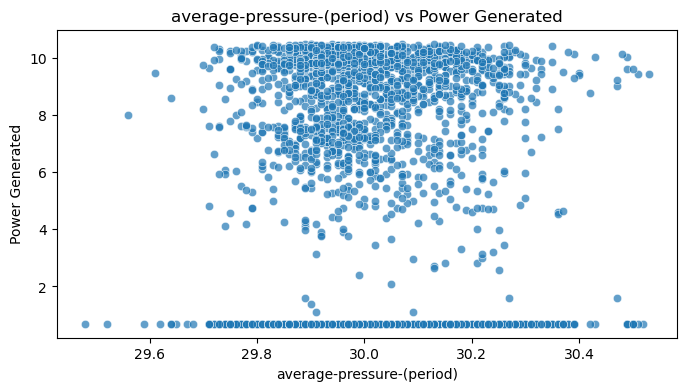

In [20]:
# Scatter plot to visualize feature vs target variable
for feature in df.columns[:-1]:  # Exclude the last column ('power-generated')
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df['power-generated'], alpha=0.7)
    plt.title(f"{feature} vs Power Generated")
    plt.xlabel(feature)
    plt.ylabel("Power Generated")
    plt.show()


# Handle Missing Values and Detect Outliers


In [22]:
# Fill missing values with the median
df.fillna(df.median(), inplace=True)
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


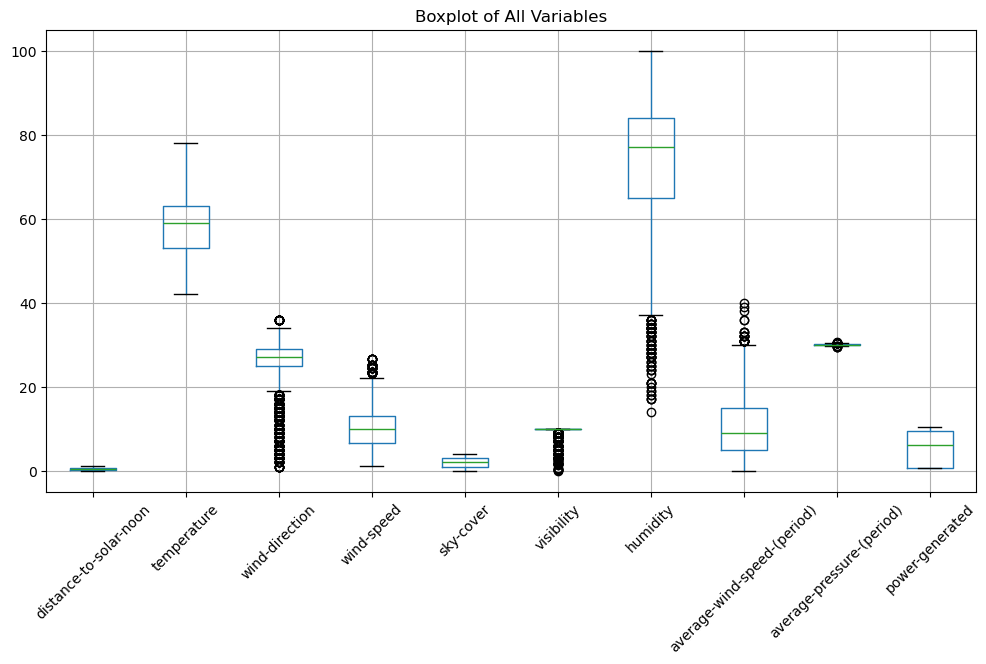

In [23]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Function to detect and cap outliers
def detect_and_cap_outliers(df):
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

df = detect_and_cap_outliers(df)
print("Outliers capped successfully.")

Outliers capped successfully.


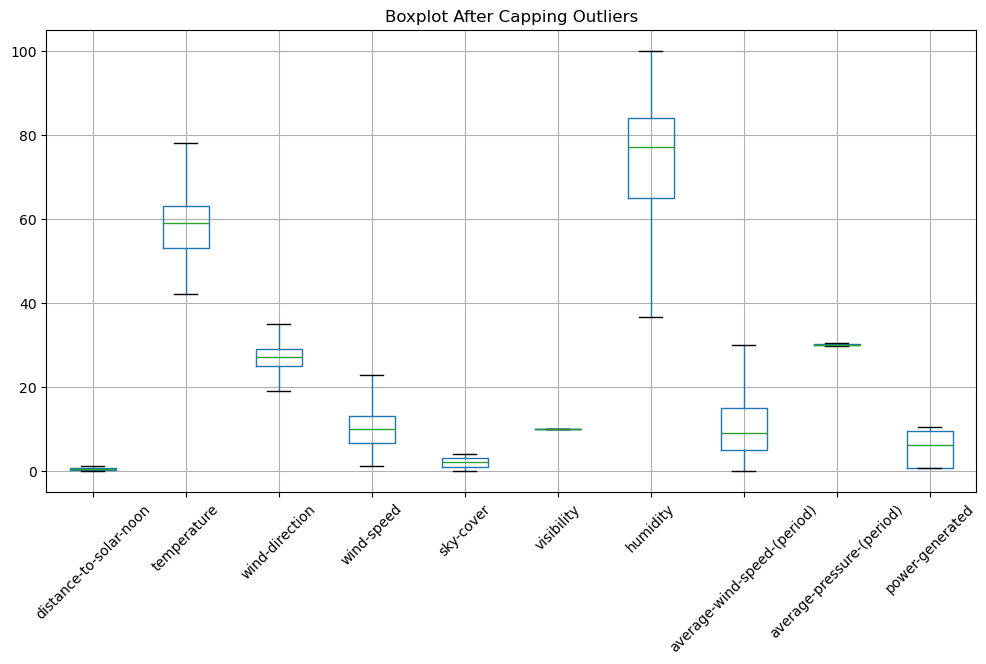

In [25]:
# Boxplot after outlier capping
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot After Capping Outliers")
plt.xticks(rotation=45)
plt.show()

# Pairwise Relationships in Numerical Data


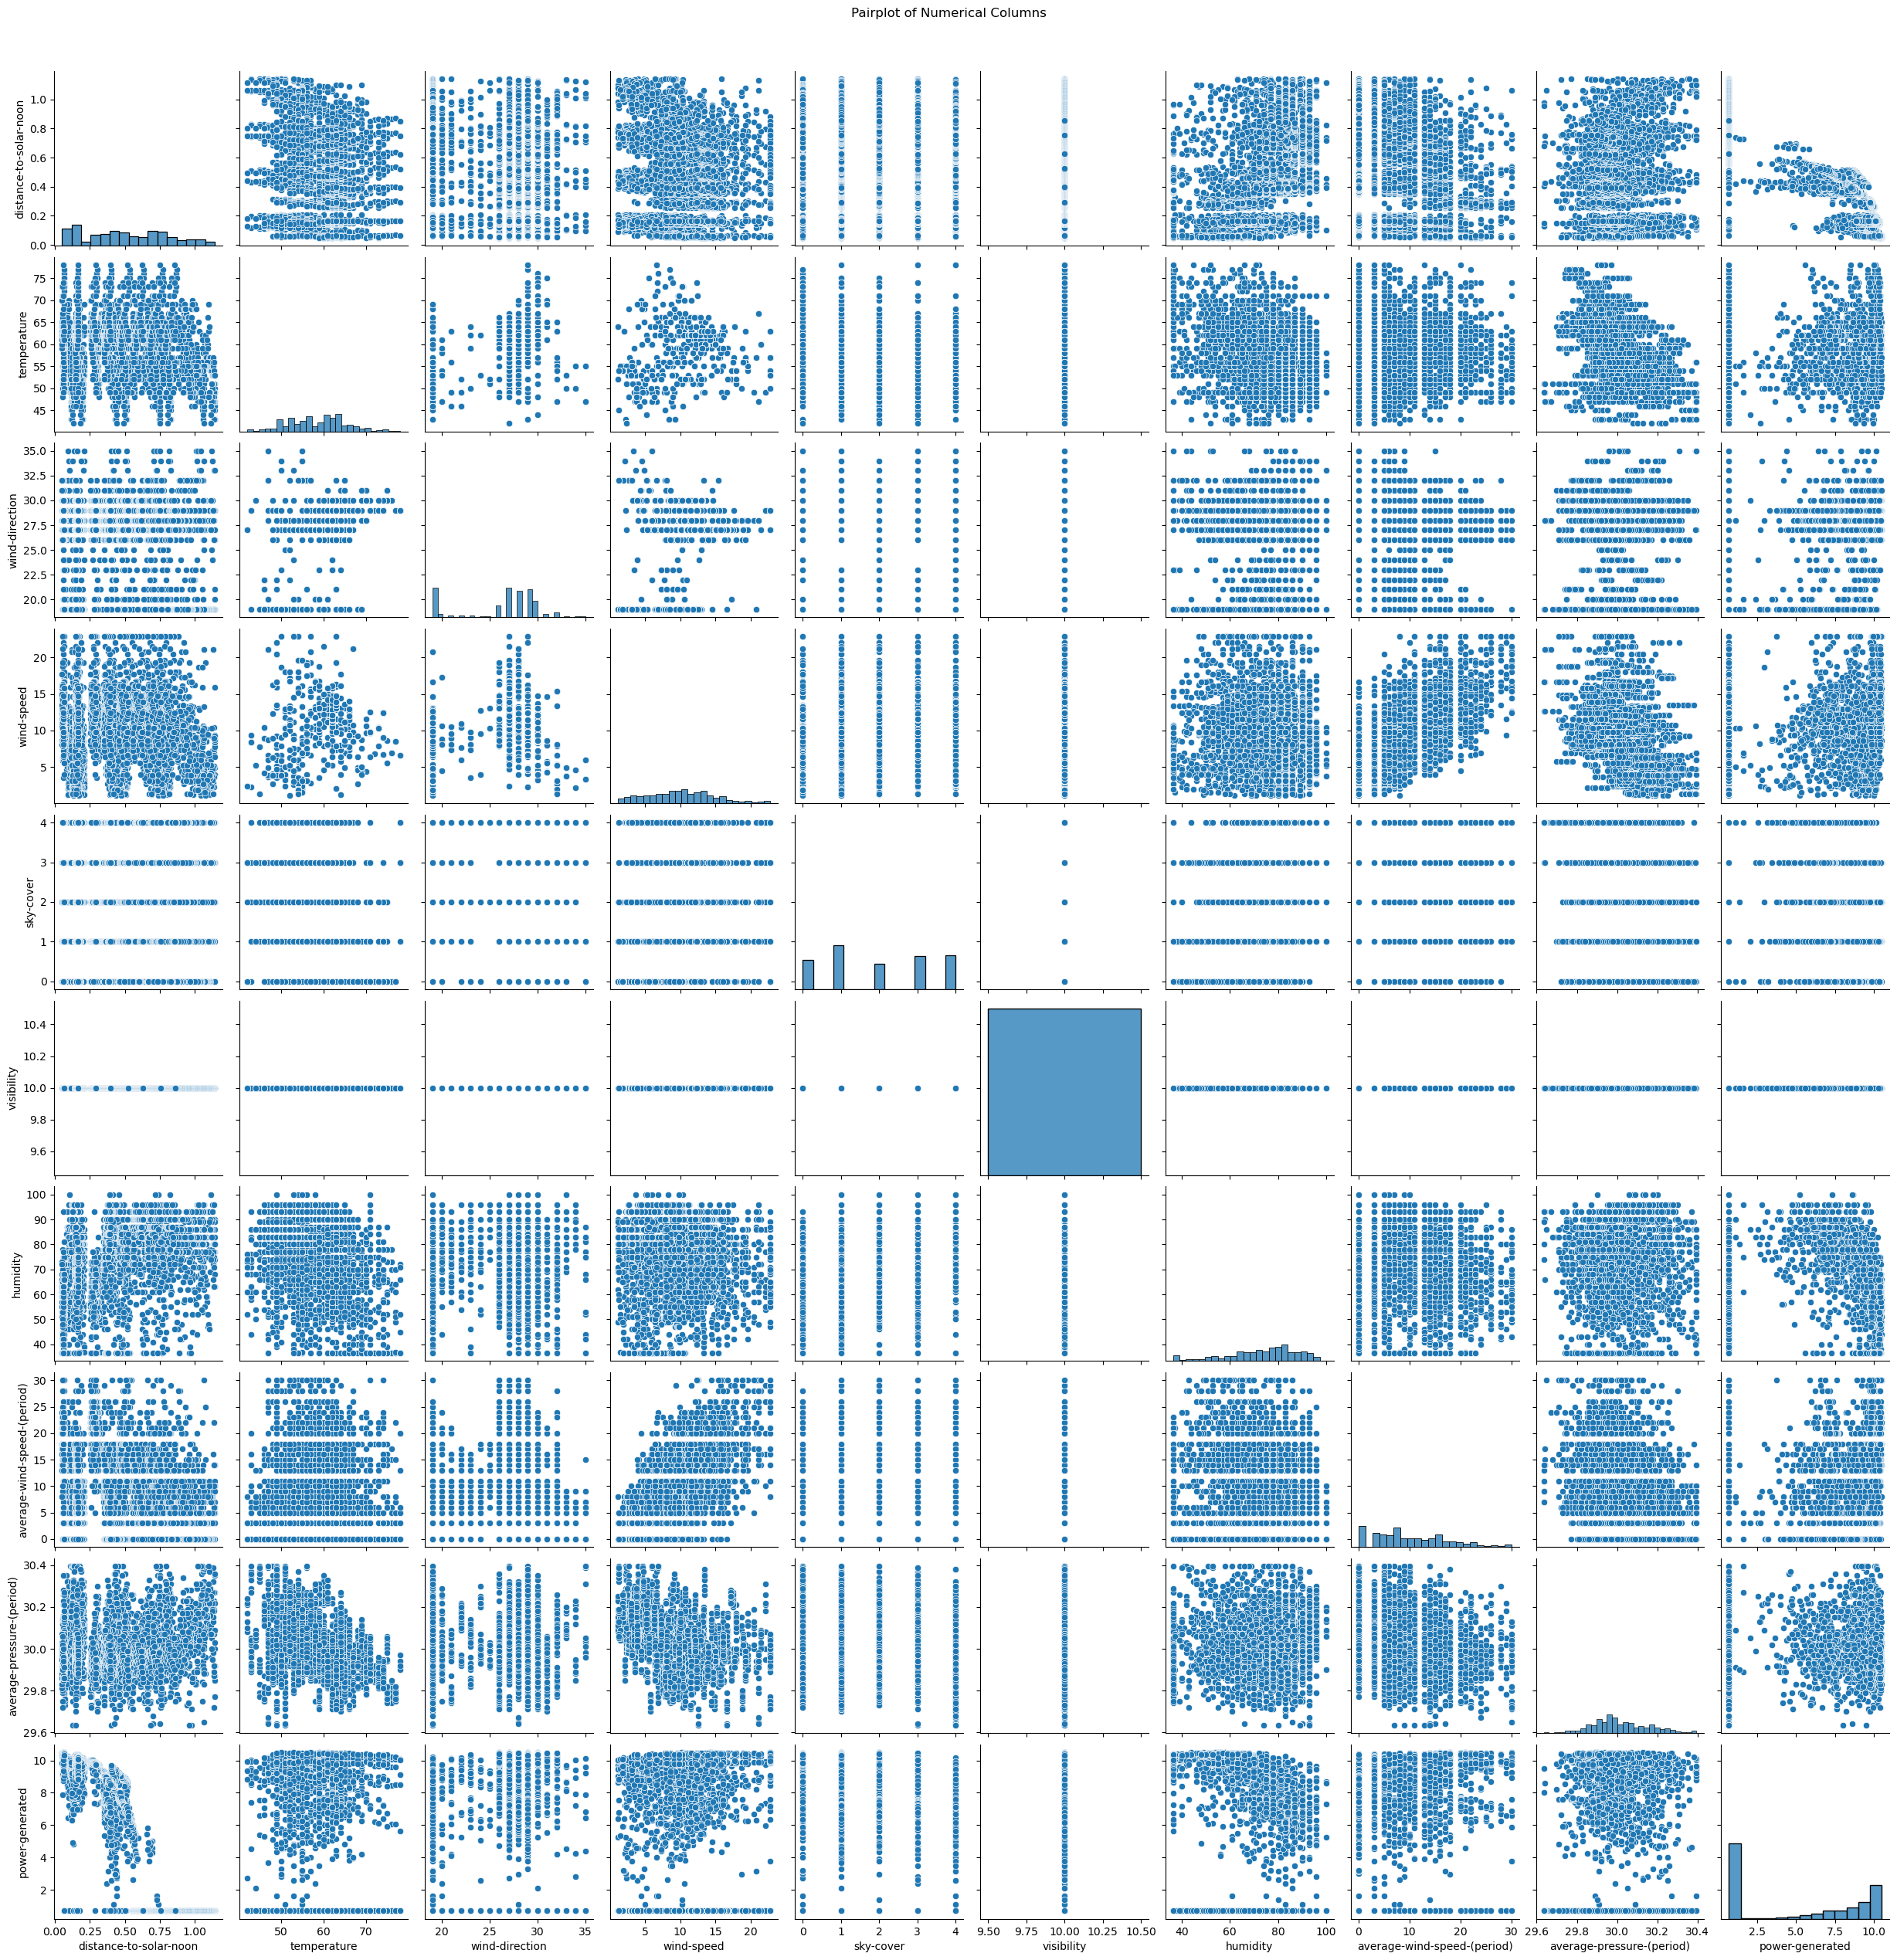

In [27]:
# Pairplot for numerical columns
sns.pairplot(df)
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

In [ ]:
df

# Prepare Data for Modeling


In [29]:
# Separate features and target
x = df.drop(columns=['power-generated'])
y = df['power-generated']

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [31]:
# Split dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Evaluation Function

In [33]:
# Define a function to evaluate models
def prediction(model):
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)

    # Model performance metrics
    train_r2 = model.score(xtrain, ytrain)
    test_r2 = model.score(xtest, ytest)
    mae = mean_absolute_error(ytest, yp)
    mse = mean_squared_error(ytest, yp)
    r2 = r2_score(ytest, yp)

    # Print results
    print(f"{model.__class__.__name__}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("=" * 50)

# Evaluate Baseline Models

In [35]:
df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0      75.0                          8.0   
1        10.0      77.0                          5.0   
2        10.0      70.0                          0.0   
3        10.0      36.5                          0.0   
4        10.0      36.5                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82         0.693147  
1                      29.85         0.693147  
2                      29.89         8.597851  
3                      29.91        10.145610  
4                      29.89        10.311317

In [36]:
# Evaluate various models
models = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    SVR(kernel='rbf', C=1.0, epsilon=0.1),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.7),
    KNeighborsRegressor(n_neighbors=5)
]

for model in models:
    prediction(model)


LinearRegression:
  Train R²: 0.7874
  Test R²: 0.7287
  Mean Absolute Error (MAE): 1.6542
  Mean Squared Error (MSE): 4.6499
  R² Score: 0.7287
DecisionTreeRegressor:
  Train R²: 0.9825
  Test R²: 0.8235
  Mean Absolute Error (MAE): 0.6366
  Mean Squared Error (MSE): 3.0247
  R² Score: 0.8235
RandomForestRegressor:
  Train R²: 0.9885
  Test R²: 0.8967
  Mean Absolute Error (MAE): 0.5553
  Mean Squared Error (MSE): 1.7710
  R² Score: 0.8967
GradientBoostingRegressor:
  Train R²: 0.9512
  Test R²: 0.8926
  Mean Absolute Error (MAE): 0.6412
  Mean Squared Error (MSE): 1.8407
  R² Score: 0.8926
SVR:
  Train R²: 0.2453
  Test R²: 0.1469
  Mean Absolute Error (MAE): 3.0045
  Mean Squared Error (MSE): 14.6215
  R² Score: 0.1469
Ridge:
  Train R²: 0.7874
  Test R²: 0.7284
  Mean Absolute Error (MAE): 1.6562
  Mean Squared Error (MSE): 4.6540
  R² Score: 0.7284
Lasso:
  Train R²: 0.7788
  Test R²: 0.7175
  Mean Absolute Error (MAE): 1.7187
  Mean Squared Error (MSE): 4.8410
  R² Score: 0.7175


# Hyperparameter Tuning for Random Forest

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_grid = {
    'n_estimators': [90, 100, 200, 300],
    'max_depth': [70, 80, 90, None],
    'min_samples_split': [8, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Example: Using neg_mean_absolute_error as scoring metric
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',  # Use a valid scoring metric
    n_jobs=-1,
    random_state=42
)

In [39]:
# Fit RandomizedSearchCV
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [70, 80, 90, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [8, 5, 10],
                                        'n_estimators': [90, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [40]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
ypred = best_model.predict(xtest)

In [41]:
# Calculate evaluation metrics
print("RandomizedSearchCV Best Model:")
print(f"  Test R²: {r2_score(ytest, ypred):.4f}")
print(f"  Mean Absolute Error (MAE): {mean_absolute_error(ytest, ypred):.4f}")
print(f"  Mean Squared Error (MSE): {mean_squared_error(ytest, ypred):.4f}")

RandomizedSearchCV Best Model:
  Test R²: 0.9051
  Mean Absolute Error (MAE): 0.5983
  Mean Squared Error (MSE): 1.6266


# Save the Best Model


In [43]:
import pickle
pickle.dump(best_model, open('best_model.pkl', 'wb'))
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'
